In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

import os
import sys 
sys.path.append(os.path.abspath("../../src"))   
import Soporte_preprocesamiento as f
import warnings
warnings.filterwarnings("ignore")




# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor



from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler


from tqdm import tqdm


# import plotly_express as px


# Métodos estadísticos
# -----------------------------------------------------------------------
from scipy.stats import zscore # para calcular el z-score
from sklearn.neighbors import LocalOutlierFactor # para detectar outliers usando el método LOF
from sklearn.ensemble import IsolationForest # para detectar outliers usando el metodo IF
from sklearn.neighbors import NearestNeighbors # para calcular la epsilon

# Para generar combinaciones de listas
# -----------------------------------------------------------------------
from itertools import product, combinations
pd.set_option("display.max_columns", None)


In [2]:

df_rob=pd.read_pickle("../../datos/datos3/datos_sinnull_encoded_balanced_scaled.pkl").reset_index(drop=True)

In [3]:
df_rob.head(2)

Age  BusinessTravel  Department  EducationField  MaritalStatus  \
0  1.422156        0.000000        -1.0             0.0            0.0   
1 -0.250969        0.113333         0.0             0.0            1.0   

   MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  \
0       1.725348                 0.0          -0.585336           5.700122   
1      -0.142262                -1.0           1.756008           0.488604   

   YearsAtCompany  YearsSinceLastPromotion  EnvironmentSatisfaction  \
0       -0.593848                -0.427915                      0.0   
1        0.000000                 0.000000                      0.0   

   JobSatisfaction  WorkLifeBalance  Gender_Female  Gender_Male  \
0        -0.998673         1.000000            1.0         -1.0   
1         0.001327         1.369994            1.0         -1.0   

   DistanceFromHome_entre 1 y 4  DistanceFromHome_entre 13 y 18  \
0                           0.0                             0.0   
1                           0.0                             0.0   

   DistanceFromHome_entre 19 y 23  DistanceFromHome_entre 24 y 29  \
0                             0.0                             0.0   
1                             0.0                             0.0   

   DistanceFromHome_entre 5 y 8  DistanceFromHome_entre 9 y 12  \
0                           1.0                            0.0   
1                           0.0                            1.0   

   Education_Bachelor  Education_Below College  Education_College  \
0                 0.0                      0.0                1.0   
1                 0.0                      1.0                0.0   

   Education_Doctor  Education_Master  JobLevel_Head  JobLevel_Intern  \
0               0.0               0.0            0.0              1.0   
1               0.0               0.0            0.0              1.0   

   JobLevel_Junior  JobLevel_Manager  JobLevel_Senior  StockOptionLevel_Bad  \
0              0.0               0.0              0.0                   1.0   
1              0.0               0.0              0.0                   0.0   

   StockOptionLevel_Best  StockOptionLevel_Better  StockOptionLevel_Good  \
0                    0.0                      0.0                    0.0   
1                    0.0                      0.0                    1.0   

   JobRole_Healthcare Representative  JobRole_Human Resources  \
0                                1.0                      0.0   
1                                0.0                      0.0   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                            0.0              0.0   
1                            0.0              0.0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                             0.0                        0.0   
1                             0.0                        0.0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                         0.0                      0.0   
1                         1.0                      0.0   

   JobRole_Sales Representative  TrainingTimesLastYear_0.0  \
0                           0.0                        0.0   
1                           0.0                        0.0   

   TrainingTimesLastYear_1.0  TrainingTimesLastYear_2.0  \
0                        0.0                        0.0   
1                        0.0                        0.0   

   TrainingTimesLastYear_3.0  TrainingTimesLastYear_4.0  \
0                        0.0                        0.0   
1                        1.0                        0.0   

   TrainingTimesLastYear_5.0  TrainingTimesLastYear_6.0  JobInvolvement_High  \
0                        0.0                        1.0                  0.0   
1                        0.0                        0.0                 -1.0   

   JobInvolvement_Low  JobInvolvement_Medium  JobInvolvement_Very High  \
0                 0.0                    0.0    

Primero identificamos los outliers en univariados

In [4]:
all_columns =df_rob.columns   

In [5]:
f.visualizar_outliers_box(df_rob, all_columns)

En esta gráfica recordamos las distribuciones (Tanto de categóricas como de numéricas) y en el caso de las numéricas muestro sus outliers univariados.

Dado que no tienen todas una distribución normal, no utilizaré el Z-Score ya que el porcentaje de fallo será demasiado alto. Por ello opto por el IQR

In [6]:
dicc_iqr=f.identificar_outliers_iqr(df_rob)

La columna AGE tiene 15 outliers
La columna BUSINESSTRAVEL tiene 563 outliers
La columna DEPARTMENT tiene 79 outliers
La columna EDUCATIONFIELD tiene 471 outliers
La columna MARITALSTATUS tiene 0 outliers
La columna MONTHLYINCOME tiene 184 outliers
La columna NUMCOMPANIESWORKED tiene 0 outliers
La columna PERCENTSALARYHIKE tiene 0 outliers
La columna TOTALWORKINGYEARS tiene 221 outliers
La columna YEARSATCOMPANY tiene 115 outliers
La columna YEARSSINCELASTPROMOTION tiene 271 outliers
La columna ENVIRONMENTSATISFACTION tiene 501 outliers
La columna JOBSATISFACTION tiene 0 outliers
La columna WORKLIFEBALANCE tiene 115 outliers
La columna GENDER_FEMALE tiene 0 outliers
La columna GENDER_MALE tiene 0 outliers
La columna DISTANCEFROMHOME_ENTRE 1 Y 4 tiene 0 outliers
La columna DISTANCEFROMHOME_ENTRE 13 Y 18 tiene 143 outliers
La columna DISTANCEFROMHOME_ENTRE 19 Y 23 tiene 115 outliers
La columna DISTANCEFROMHOME_ENTRE 24 Y 29 tiene 138 outliers
La columna DISTANCEFROMHOME_ENTRE 5 Y 8 tiene

In [14]:
dicc_iqr["MonthlyIncome"].head(2)

Age  BusinessTravel  Department  EducationField  MaritalStatus  \
2  -0.167312        0.113333         0.0      -70.820334            0.0   
24 -0.669250        0.113333         0.0        0.000000            0.0   

    MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  \
2        3.024955                 0.0           0.195112           0.376664   
24       2.389587                 0.0           1.560896           0.376664   

    YearsAtCompany  YearsSinceLastPromotion  EnvironmentSatisfaction  \
2              0.0                -0.427915                 0.826826   
24             0.0                 0.855830                 5.040761   

    JobSatisfaction  WorkLifeBalance  Gender_Female  Gender_Male  \
2          0.001327         6.638161            0.0          0.0   
24         1.259104         0.000000            1.0         -1.0   

    DistanceFromHome_entre 1 y 4  DistanceFromHome_entre 13 y 18  \
2                            0.0                             1.0   
24                           0.0                             0.0   

    DistanceFromHome_entre 19 y 23  DistanceFromHome_entre 24 y 29  \
2                              0.0                             0.0   
24                             0.0                             0.0   

    DistanceFromHome_entre 5 y 8  DistanceFromHome_entre 9 y 12  \
2                            0.0                            0.0   
24                           0.0                            1.0   

    Education_Bachelor  Education_Below College  Education_College  \
2                  0.0                      0.0                0.0   
24                 1.0                      0.0                0.0   

    Education_Doctor  Education_Master  JobLevel_Head  JobLevel_Intern  \
2                0.0               1.0            0.0              0.0   
24               0.0               0.0            0.0              1.0   

    JobLevel_Junior  JobLevel_Manager  JobLevel_Senior  StockOptionLevel_Bad  \
2               0.0               1.0              0.0                   0.0   
24              0.0               0.0              0.0                   1.0   

    StockOptionLevel_Best  StockOptionLevel_Better  StockOptionLevel_Good  \
2                     1.0                      0.0                    0.0   
24                    0.0                      0.0                    0.0   

    JobRole_Healthcare Representative  JobRole_Human Resources  \
2                                 0.0                      0.0   
24                                0.0                      0.0   

    JobRole_Laboratory Technician  JobRole_Manager  \
2                             0.0              0.0   
24                            0.0              1.0   

    JobRole_Manufacturing Director  JobRole_Research Director  \
2                              0.0                        0.0   
24                             0.0                        0.0   

    JobRole_Research Scientist  JobRole_Sales Executive  \
2                          0.0                      1.0   
24                         0.0                      0.0   

    JobRole_Sales Representative  TrainingTimesLastYear_0.0  \
2                            0.0                        0.0   
24                           0.0                        0.0   

    TrainingTimesLastYear_1.0  TrainingTimesLastYear_2.0  \
2                         0.0                        1.0   
24                        0.0                        0.0   

    TrainingTimesLastYear_3.0  TrainingTimesLastYear_4.0  \
2                         0.0                        0.0   
24                        1.0                        0.0   

    TrainingTimesLastYear_5.0  TrainingTimesLastYear_6.0  JobInvolvement_High  \
2                         0.0                        0.0                  0.0   
24                        0.0                        0.0                  0.0   

    JobInvolvement_Low  JobInvolvement_Medium  JobInvolvement_Very

In [13]:
dicc_iqr["YearsAtCompany"].head(2)

Age  BusinessTravel  Department  EducationField  MaritalStatus  \
10  0.920219             0.0         0.0             1.0            0.0   
12  1.756781             0.0         0.0             0.0            1.0   

    MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  \
10       0.653151                -1.0          -0.195112          -1.799299   
12       0.139961                -1.0           0.585336          -0.338562   

    YearsAtCompany  YearsSinceLastPromotion  EnvironmentSatisfaction  \
10        2.226931                 1.283744                 0.000000   
12        4.602325                 1.283744                -0.173174   

    JobSatisfaction  WorkLifeBalance  Gender_Female  Gender_Male  \
10        -0.998673              0.0            0.0          0.0   
12         1.259104              0.0            1.0         -1.0   

    DistanceFromHome_entre 1 y 4  DistanceFromHome_entre 13 y 18  \
10                           0.0                             1.0   
12                           0.0                             1.0   

    DistanceFromHome_entre 19 y 23  DistanceFromHome_entre 24 y 29  \
10                             0.0                             0.0   
12                             0.0                             0.0   

    DistanceFromHome_entre 5 y 8  DistanceFromHome_entre 9 y 12  \
10                           0.0                            0.0   
12                           0.0                            0.0   

    Education_Bachelor  Education_Below College  Education_College  \
10                 0.0                      0.0                1.0   
12                 0.0                      0.0                0.0   

    Education_Doctor  Education_Master  JobLevel_Head  JobLevel_Intern  \
10               0.0               0.0            0.0              0.0   
12               0.0               1.0            0.0              1.0   

    JobLevel_Junior  JobLevel_Manager  JobLevel_Senior  StockOptionLevel_Bad  \
10              1.0               0.0              0.0                   0.0   
12              0.0               0.0              0.0                   1.0   

    StockOptionLevel_Best  StockOptionLevel_Better  StockOptionLevel_Good  \
10                    0.0                      1.0                    0.0   
12                    0.0                      0.0                    0.0   

    JobRole_Healthcare Representative  JobRole_Human Resources  \
10                                0.0                      0.0   
12                                0.0                      0.0   

    JobRole_Laboratory Technician  JobRole_Manager  \
10                            1.0              0.0   
12                            0.0              0.0   

    JobRole_Manufacturing Director  JobRole_Research Director  \
10                             0.0                        0.0   
12                             0.0                        0.0   

    JobRole_Research Scientist  JobRole_Sales Executive  \
10                         0.0                      0.0   
12                         0.0                      1.0   

    JobRole_Sales Representative  TrainingTimesLastYear_0.0  \
10                           0.0                        0.0   
12                           0.0                        0.0   

    TrainingTimesLastYear_1.0  TrainingTimesLastYear_2.0  \
10                        0.0                        1.0   
12                        0.0                        1.0   

    TrainingTimesLastYear_3.0  TrainingTimesLastYear_4.0  \
10                        0.0                        0.0   
12                        0.0                        0.0   

    TrainingTimesLastYear_5.0  TrainingTimesLastYear_6.0  JobInvolvement_High  \
10                        0.0                        0.0                 -1.0   
12                        0.0                        0.0                  0.0   

    JobInvolvement_Low  JobInvolvement_Medium  JobInvolvement_Very

In [16]:
dicc_iqr["YearsSinceLastPromotion"].head(2)

Age  BusinessTravel  Department  EducationField  MaritalStatus  \
3  0.334625       -0.070455         0.0             0.0            0.0   
5  1.003875        0.000000         0.0             0.0            0.0   

   MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  \
3       0.722190           -1.203634          -0.585336          -1.020221   
5      -0.166949           -1.203634          -0.195112          -0.481794   

   YearsAtCompany  YearsSinceLastPromotion  EnvironmentSatisfaction  \
3        0.445386                 2.567489                -0.173174   
5        0.296924                 2.567489                 0.000000   

   JobSatisfaction  WorkLifeBalance  Gender_Female  Gender_Male  \
3        -0.998673              0.0            0.0          0.0   
5         0.001327              1.0            1.0         -1.0   

   DistanceFromHome_entre 1 y 4  DistanceFromHome_entre 13 y 18  \
3                           1.0                             0.0   
5                           0.0                             0.0   

   DistanceFromHome_entre 19 y 23  DistanceFromHome_entre 24 y 29  \
3                             0.0                             0.0   
5                             0.0                             0.0   

   DistanceFromHome_entre 5 y 8  DistanceFromHome_entre 9 y 12  \
3                           0.0                            0.0   
5                           1.0                            0.0   

   Education_Bachelor  Education_Below College  Education_College  \
3                 0.0                      0.0                0.0   
5                 1.0                      0.0                0.0   

   Education_Doctor  Education_Master  JobLevel_Head  JobLevel_Intern  \
3               1.0               0.0            0.0              0.0   
5               0.0               0.0            0.0              0.0   

   JobLevel_Junior  JobLevel_Manager  JobLevel_Senior  StockOptionLevel_Bad  \
3              0.0               0.0              1.0                   0.0   
5              0.0               1.0              0.0                   1.0   

   StockOptionLevel_Best  StockOptionLevel_Better  StockOptionLevel_Good  \
3                    1.0                      0.0                    0.0   
5                    0.0                      0.0                    0.0   

   JobRole_Healthcare Representative  JobRole_Human Resources  \
3                                0.0                      1.0   
5                                0.0                      0.0   

   JobRole_Laboratory Technician  JobRole_Manager  \
3                            0.0              0.0   
5                            0.0              0.0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
3                             0.0                        0.0   
5                             0.0                        1.0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
3                         0.0                      0.0   
5                         0.0                      0.0   

   JobRole_Sales Representative  TrainingTimesLastYear_0.0  \
3                           0.0                        0.0   
5                           0.0                        0.0   

   TrainingTimesLastYear_1.0  TrainingTimesLastYear_2.0  \
3                        0.0                        0.0   
5                        0.0                        0.0   

   TrainingTimesLastYear_3.0  TrainingTimesLastYear_4.0  \
3                        0.0                        0.0   
5                        0.0                        0.0   

   TrainingTimesLastYear_5.0  TrainingTimesLastYear_6.0  JobInvolvement_High  \
3                        1.0                        0.0                 -1.0   
5                        1.0                        0.0                  0.0   

   JobInvolvement_Low  JobInvolvement_Medium  JobInvolvement_Very High  \
3                 0.0                    1.0    

In [17]:
dicc_iqr["TotalWorkingYears"].head(2)

Age  BusinessTravel  Department  EducationField  MaritalStatus  \
0   1.422156             0.0   -1.000000        0.000000            0.0   
96 -0.083656             0.0   20.522155      237.894834            1.0   

    MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  \
0        1.725348                 0.0          -0.585336           5.700122   
96       0.144773                 0.0           1.365784           5.700122   

    YearsAtCompany  YearsSinceLastPromotion  EnvironmentSatisfaction  \
0        -0.593848                -0.427915                 0.000000   
96       -0.593848                -0.427915                -0.173174   

    JobSatisfaction  WorkLifeBalance  Gender_Female  Gender_Male  \
0         -0.998673              1.0            1.0         -1.0   
96         0.000000              0.0            1.0         -1.0   

    DistanceFromHome_entre 1 y 4  DistanceFromHome_entre 13 y 18  \
0                            0.0                             0.0   
96                           0.0                             0.0   

    DistanceFromHome_entre 19 y 23  DistanceFromHome_entre 24 y 29  \
0                              0.0                             0.0   
96                             0.0                             1.0   

    DistanceFromHome_entre 5 y 8  DistanceFromHome_entre 9 y 12  \
0                            1.0                            0.0   
96                           0.0                            0.0   

    Education_Bachelor  Education_Below College  Education_College  \
0                  0.0                      0.0                1.0   
96                 0.0                      0.0                1.0   

    Education_Doctor  Education_Master  JobLevel_Head  JobLevel_Intern  \
0                0.0               0.0            0.0              1.0   
96               0.0               0.0            1.0              0.0   

    JobLevel_Junior  JobLevel_Manager  JobLevel_Senior  StockOptionLevel_Bad  \
0               0.0               0.0              0.0                   1.0   
96              0.0               0.0              0.0                   0.0   

    StockOptionLevel_Best  StockOptionLevel_Better  StockOptionLevel_Good  \
0                     0.0                      0.0                    0.0   
96                    0.0                      0.0                    1.0   

    JobRole_Healthcare Representative  JobRole_Human Resources  \
0                                 1.0                      0.0   
96                                0.0                      0.0   

    JobRole_Laboratory Technician  JobRole_Manager  \
0                             0.0              0.0   
96                            0.0              1.0   

    JobRole_Manufacturing Director  JobRole_Research Director  \
0                              0.0                        0.0   
96                             0.0                        0.0   

    JobRole_Research Scientist  JobRole_Sales Executive  \
0                          0.0                      0.0   
96                         0.0                      0.0   

    JobRole_Sales Representative  TrainingTimesLastYear_0.0  \
0                            0.0                        0.0   
96                           0.0                        0.0   

    TrainingTimesLastYear_1.0  TrainingTimesLastYear_2.0  \
0                         0.0                        0.0   
96                        0.0                        0.0   

    TrainingTimesLastYear_3.0  TrainingTimesLastYear_4.0  \
0                         0.0                        0.0   
96                        1.0                        0.0   

    TrainingTimesLastYear_5.0  TrainingTimesLastYear_6.0  JobInvolvement_High  \
0                         0.0                        1.0                  0.0   
96                        0.0                        0.0                 -1.0   

    JobInvolvement_Low  JobInvolvement_Medium  JobInvolvement_Very

Observamos como el número de outliers por lo general es alto (un poco menos del 10% de las filas) y parecen estar muy juntos entre ellos en MonthlyIncome, mientras que en el resto si que están más separados. Esto me lleva a pensar que un LOF podría ser la mejor opción. Sin embargo, vamos a comprobarlo. 

In [18]:
# contaminacion= [0.01, 0.05, 0.1]
# estimadores = [100,400,1000, 2000] 
# combinaciones= list(product(contaminacion, estimadores))
# for cont, esti in combinaciones:
    
#     ifo=IsolationForest(random_state=42, n_estimators=esti, contamination= cont, n_jobs=-1)         #n_estimator es el número de árboles y n_jobs con -1 coge todos los nucleos del ordenador

#     df_rob[f"outliers_ifo_{cont}_{esti}"]=ifo.fit_predict(df_rob[["price","size_MinMax","distance_MinMax"]]) 

In [19]:
# df_rob["outliers_ifo_0.01_100"].value_counts(normalize=True)    #Esto nos muetsra como se acerca mucho al 1% de outliers por el nivel de contaminación ser 0.01

In [20]:
# df_min.head()

In [21]:
# columnas_hue=df_min.filter(like="outliers")

In [22]:
# combinaciones_visual=list(combinations(["price","size_MinMax","distance_MinMax"], 2))

# for out in columnas_hue:


#     fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(15,5))
#     axes=axes.flat
#     for indice, tupla in enumerate(combinaciones_visual):
#         sns.scatterplot(x=tupla[0], y=tupla[1], ax= axes[indice], data=df_min, hue= out, palette= "Set1", alpha= 0.2, style= out)

<!-- Observamos como a mayor número de arboles los outliers se van agrupando más.  
Además según vamos siendo más estrictos con el nivel de contaminación, más sentido tiene la interpretación. 
Podemos observar como el IFO nos muestrá que por lo general los precios bajos son considerados outliers. -->

In [23]:
# df_min.head()

<!-- 
A pesar de que teóricamente el IFO por las carcaterísticas de los datos parece ser la mejor opción y tras haber observado que marca outliers en los precios ma´s bajo. Pasamos ahora a identificar los outliers con la metodología LOF.

Para poder comparar más fácil voy a sacar IFO y LOF juntos. -->

100%|██████████| 12/12 [00:17<00:00,  1.45s/it]


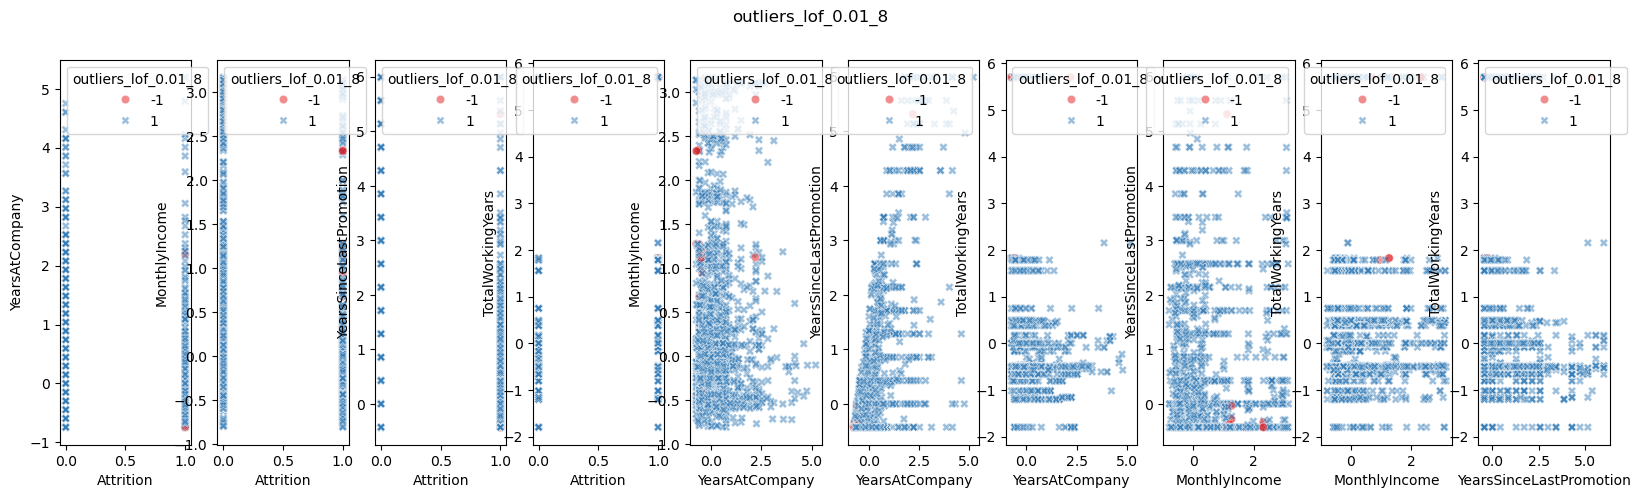

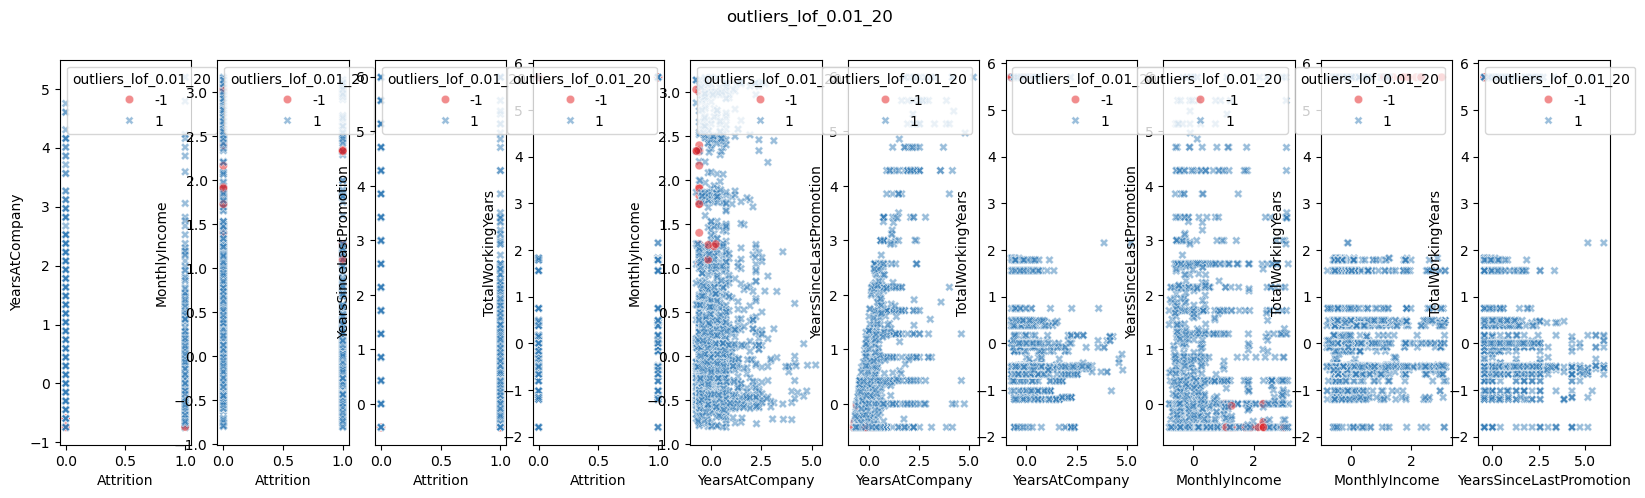

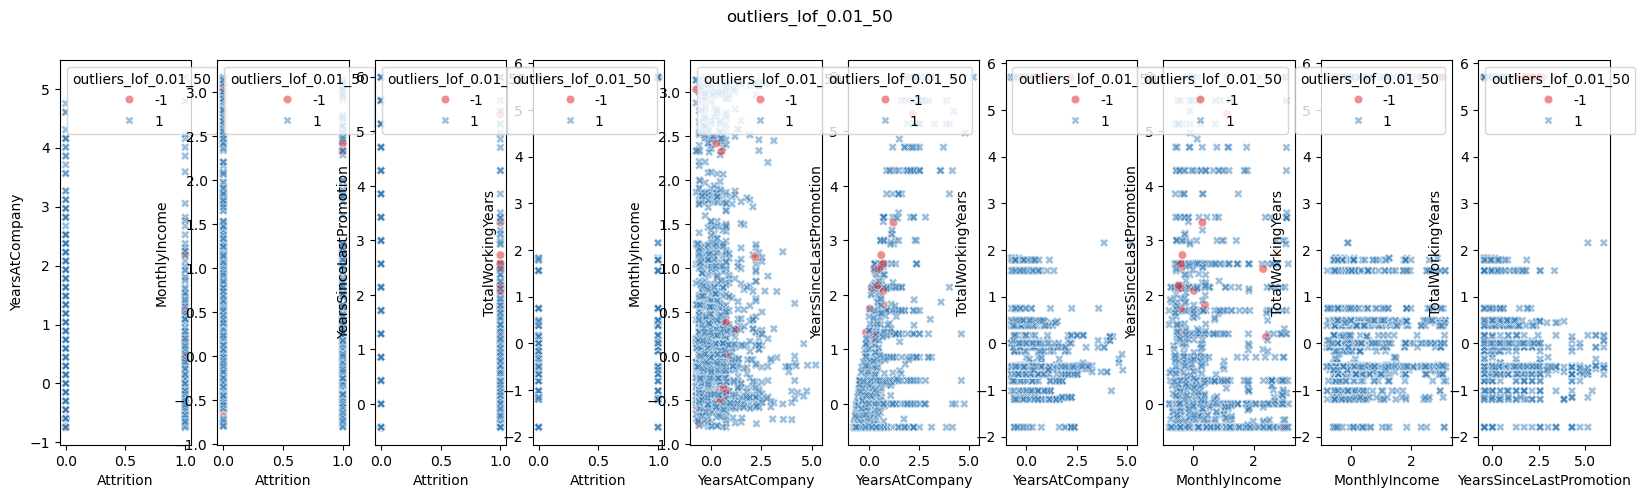

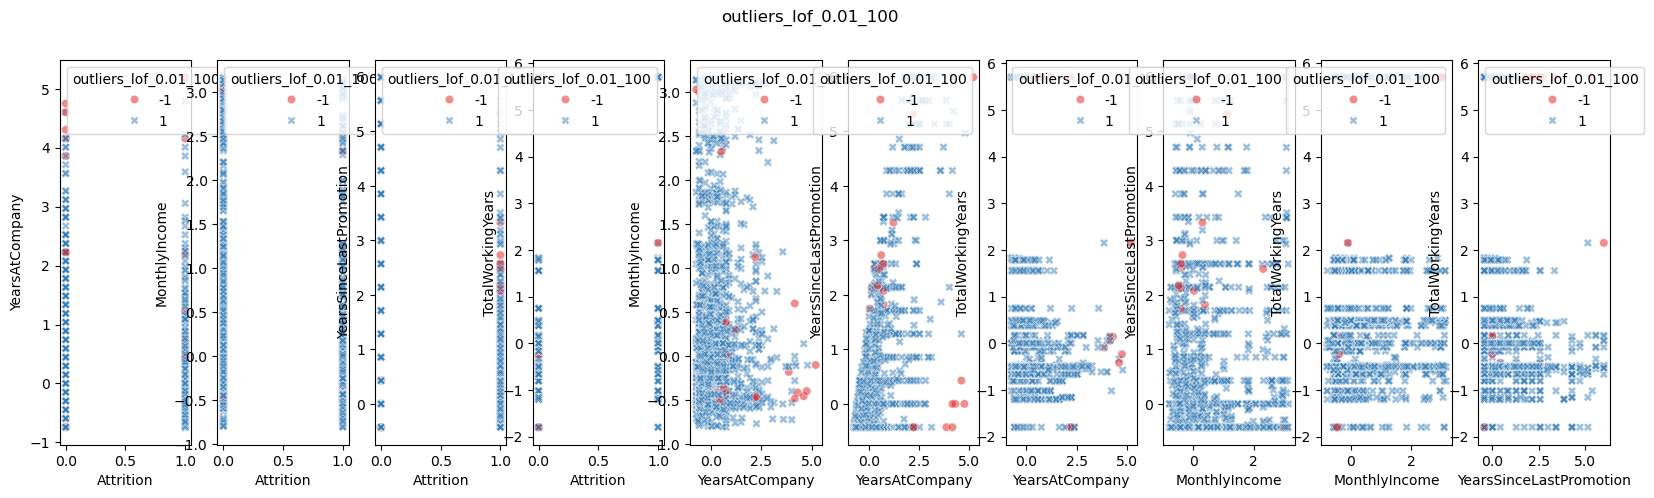

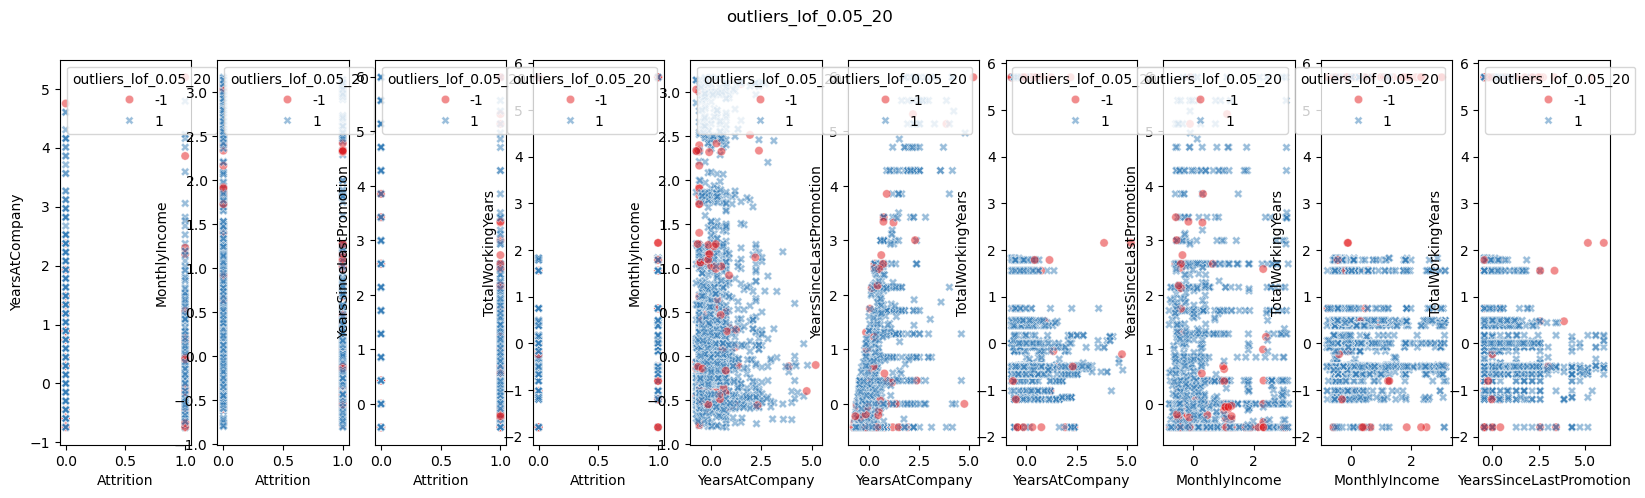

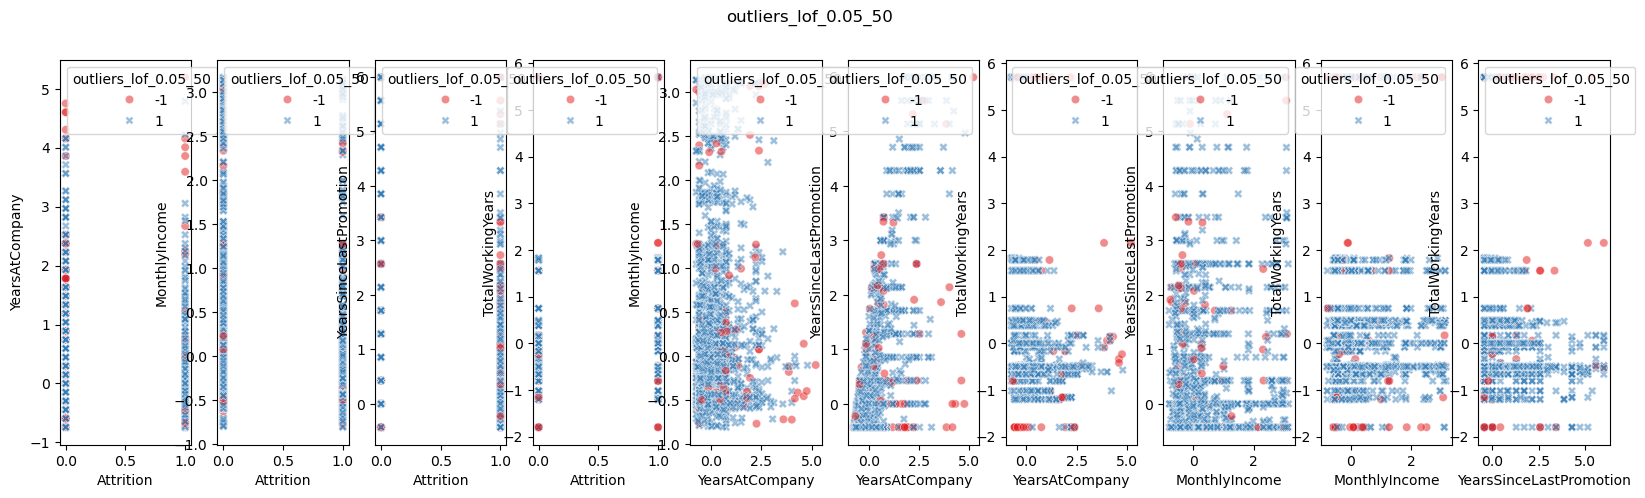

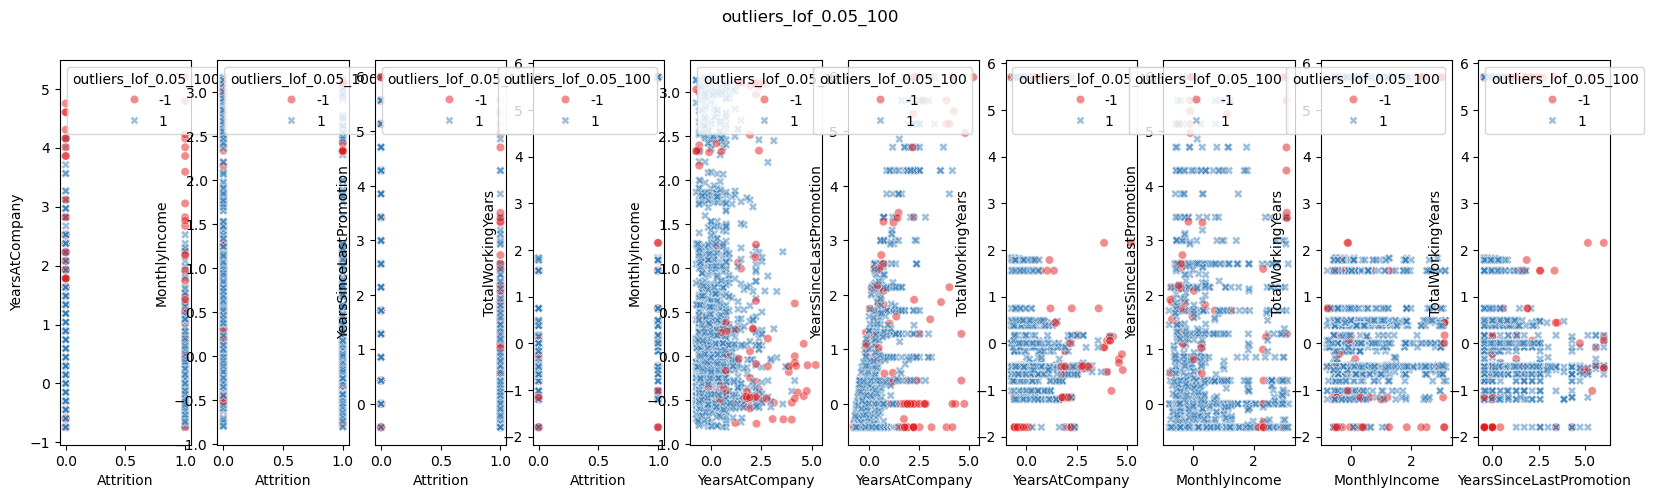

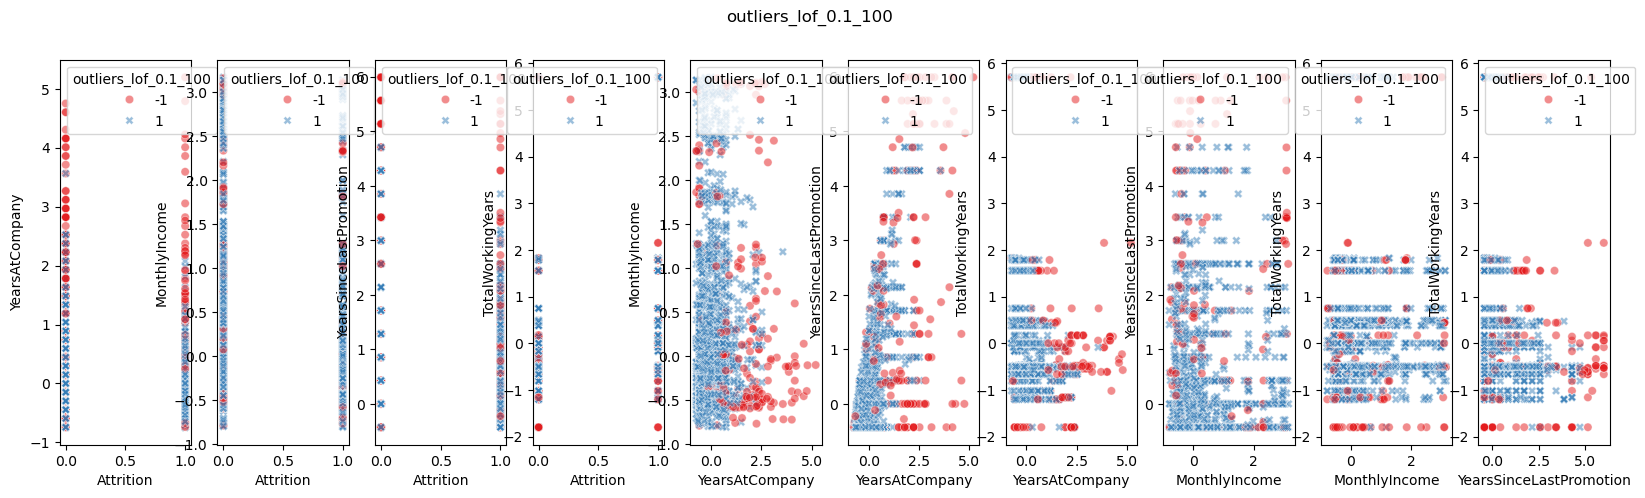

In [24]:
lista_contaminaciones = [0.01, 0.05, 0.1]
lista_neighbors = [8,20,50,100]

combinaciones = list(product(lista_contaminaciones, lista_neighbors))
combinaciones


for cont, neighbors in tqdm(combinaciones):
    lof = LocalOutlierFactor(n_neighbors=neighbors,
                            contamination=cont,
                            n_jobs=-1)

    df_rob[f"outliers_lof_{cont}_{neighbors}"] = lof.fit_predict(df_rob[["Attrition","YearsAtCompany","MonthlyIncome", "YearsSinceLastPromotion","TotalWorkingYears"]])
    y_pred = lof.fit_predict(df_rob[["Attrition","YearsAtCompany","MonthlyIncome", "YearsSinceLastPromotion","TotalWorkingYears"]])
df_rob

#visualizacion
columnas_hue = df_rob.filter(like="outlier").columns

combinaciones_viz = list(combinations(["Attrition","YearsAtCompany","MonthlyIncome", "YearsSinceLastPromotion","TotalWorkingYears"], 2))
combinaciones_viz

for outlier in tqdm(columnas_hue):
    fig, axes = plt.subplots(nrows=1, ncols=10, figsize = (20, 5))
    axes = axes.flat

    for indice, tupla in enumerate(combinaciones_viz):
        sns.scatterplot(x = tupla[0],
                        y = tupla[1],
                        ax = axes[indice],
                        data = df_rob,
                        hue=outlier,
                        palette="Set1",
                        style=outlier,
                        alpha=0.5)
        
    plt.suptitle(outlier)

Lo que saco en claro es que el nivel de contaminación más estricto (10%) es la mejor opción porque es el que más se acerca a la realidad de los datos.  

In [25]:
df_rob.head()

Age  BusinessTravel  Department  EducationField  MaritalStatus  \
0  1.422156        0.000000        -1.0        0.000000            0.0   
1 -0.250969        0.113333         0.0        0.000000            1.0   
2 -0.167312        0.113333         0.0      -70.820334            0.0   
3  0.334625       -0.070455         0.0        0.000000            0.0   
4 -0.167312        0.000000         0.0        1.000000            1.0   

   MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  \
0       1.725348            0.000000          -0.585336           5.700122   
1      -0.142262           -1.000000           1.756008           0.488604   
2       3.024955            0.000000           0.195112           0.376664   
3       0.722190           -1.203634          -0.585336          -1.020221   
4      -0.528671           -0.881345          -0.390224          -0.662387   

   YearsAtCompany  YearsSinceLastPromotion  EnvironmentSatisfaction  \
0       -0.593848                -0.427915                 0.000000   
1        0.000000                 0.000000                 0.000000   
2        0.000000                -0.427915                 0.826826   
3        0.445386                 2.567489                -0.173174   
4        0.148462                -0.427915                -0.173174   

   JobSatisfaction  WorkLifeBalance  Gender_Female  Gender_Male  \
0        -0.998673         1.000000            1.0         -1.0   
1         0.001327         1.369994            1.0         -1.0   
2         0.001327         6.638161            0.0          0.0   
3        -0.998673         0.000000            0.0          0.0   
4         1.259104         0.000000            0.0          0.0   

   DistanceFromHome_entre 1 y 4  DistanceFromHome_entre 13 y 18  \
0                           0.0                             0.0   
1                           0.0                             0.0   
2                           0.0                             1.0   
3                           1.0                             0.0   
4                           0.0                             0.0   

   DistanceFromHome_entre 19 y 23  DistanceFromHome_entre 24 y 29  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             0.0                             0.0   

   DistanceFromHome_entre 5 y 8  DistanceFromHome_entre 9 y 12  \
0                           1.0                            0.0   
1                           0.0                            1.0   
2                           0.0                            0.0   
3                           0.0                            0.0   
4                           0.0                            1.0   

   Education_Bachelor  Education_Below College  Education_College  \
0                 0.0                      0.0                1.0   
1                 0.0                      1.0                0.0   
2                 0.0                      0.0                0.0   
3                 0.0                      0.0                0.0   
4                 0.0                      1.0                0.0   

   Education_Doctor  Education_Master  JobLevel_Head  JobLevel_Intern  \
0               0.0               0.0            0.0              1.0   
1               0.0               0.0            0.0              1.0   
2               0.0               1.0            0.0              0.0   
3               1.0               0.0            0.0              0.0   
4               0.0               0.0            0.0              1.0   

   JobLevel_Junior  JobLevel_Manager  JobLevel_Senior  StockOptionLevel_Bad  \
0              0.0               0.0              0.0                   1.0   
1              0.0               0.0 

Ahora me quito las que tengan todas las filas con 1 y así me quedo con todas las que al menos tienen un Outlier

In [26]:
columnasdf=df_rob.filter(like="outliers_lof")
columnas_lof=columnasdf.columns

In [27]:

# filtered_df = df_rob[(df_rob[columnas_lof] == -1).all(axis=1)]

In [28]:
# filtered_df

In [29]:
# filtered_df.shape

<!-- Al observar las filas que tienen todos los valores con -1 y observar que suponen una parte ínfima de los datos, se decide eliminarlos -->

In [30]:
# df_result = df_rob.drop(index = filtered_df.index)

In [31]:
# df_result.reset_index(drop=True, inplace=True)

In [32]:
# df_result.shape

Ahora seleccionamos el 70% de los outliers

In [33]:
proporcion = (1-0.7) * len(columnas_lof)
df_outliers_70 = df_rob[df_rob[columnas_lof].eq(-1).sum(axis=1) >= proporcion]


In [34]:
df_rob.shape

(2181, 69)

In [35]:
df_outliers_70.shape

(144, 69)

#### ***Observamos El MonthlyIncome***

In [36]:
df_outliers_70["MonthlyIncome"].shape

(144,)

In [37]:
df_outliers_70["MonthlyIncome"].max()

3.11114891797848

In [38]:
df_outliers_70[df_outliers_70["MonthlyIncome"] > -0.12]["MonthlyIncome"]

0       1.725348
12      0.139961
53      3.095458
66      0.216950
160     0.099165
          ...   
2076    3.107880
2099    2.327523
2137    1.093536
2148    3.095637
2168    1.272069
Name: MonthlyIncome, Length: 89, dtype: float64

In [39]:
df_outliers_70[df_outliers_70["MonthlyIncome"] > -0.12]["MonthlyIncome"].shape

(89,)

In [40]:
df_outliers_70[df_outliers_70["MonthlyIncome"] < -0.12]["MonthlyIncome"].shape

(55,)

Estamos observando los valores menores a -0.12 (aproximadamente a partir de 375 €)

In [41]:
df_outliers_70.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 2168
Data columns (total 69 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                144 non-null    float64
 1   BusinessTravel                     144 non-null    float64
 2   Department                         144 non-null    float64
 3   EducationField                     144 non-null    float64
 4   MaritalStatus                      144 non-null    float64
 5   MonthlyIncome                      144 non-null    float64
 6   NumCompaniesWorked                 144 non-null    float64
 7   PercentSalaryHike                  144 non-null    float64
 8   TotalWorkingYears                  144 non-null    float64
 9   YearsAtCompany                     144 non-null    float64
 10  YearsSinceLastPromotion            144 non-null    float64
 11  EnvironmentSatisfaction            144 non-null    float64
 12

#### ***Observamos El YearsAtCompany***

In [42]:
df_outliers_70["YearsAtCompany"].shape

(144,)

In [43]:
df_outliers_70["YearsAtCompany"].max()

5.1961730911523984

In [44]:
df_outliers_70[df_outliers_70["YearsAtCompany"] > 4.1]["YearsAtCompany"]

12      4.602325
280     4.305401
650     4.156938
778     4.156938
782     4.602325
1190    4.750787
1217    5.196173
1534    4.790248
Name: YearsAtCompany, dtype: float64

In [45]:
df_outliers_70[df_outliers_70["YearsAtCompany"] > 4.1]["YearsAtCompany"].shape

(8,)

In [46]:
df_outliers_70[df_outliers_70["YearsAtCompany"] < 4.1]["YearsAtCompany"].shape

(136,)

Estamos observando los valores mayores a 4.1 (aproximadamente a partir de 31 años en la empresa)

#### ***Observamos El YearsSinceLastPromotion***

In [47]:
df_outliers_70["YearsSinceLastPromotion"].shape

(144,)

In [48]:
df_outliers_70["YearsSinceLastPromotion"].max()

5.990807531041479

In [49]:
df_outliers_70[df_outliers_70["YearsSinceLastPromotion"] > 4.1]["YearsSinceLastPromotion"]

53      4.279148
312     5.134978
618     5.990808
882     5.562893
1214    5.990808
1217    5.990808
1534    4.967053
1774    5.313968
2148    4.702873
Name: YearsSinceLastPromotion, dtype: float64

In [50]:
df_outliers_70[df_outliers_70["YearsSinceLastPromotion"] > 4.1]["YearsSinceLastPromotion"].shape

(9,)

In [51]:
df_outliers_70[df_outliers_70["YearsSinceLastPromotion"] < 4.1]["YearsSinceLastPromotion"].shape

(135,)

Estamos observando los valores mayores a 4.1 (aproximadamente a partir de 13 años desde la última promoción)

#### ***Observamos El TotalWorkingYears***

In [52]:
df_outliers_70["TotalWorkingYears"].shape

(144,)

In [53]:
df_outliers_70["TotalWorkingYears"].max()

5.700121861439258

In [54]:
df_outliers_70[df_outliers_70["TotalWorkingYears"] > 2.1]["TotalWorkingYears"]

0       5.700122
200     5.700122
312     2.150782
396     5.700122
500     5.700122
          ...   
2012    5.700122
2073    5.700122
2099    5.700122
2114    5.700122
2137    5.700122
Name: TotalWorkingYears, Length: 62, dtype: float64

In [55]:
df_outliers_70[df_outliers_70["TotalWorkingYears"] > 2.1]["TotalWorkingYears"].shape

(62,)

In [56]:
df_outliers_70[df_outliers_70["TotalWorkingYears"] < 2.1]["TotalWorkingYears"].shape

(82,)

Estamos observando los valores mayores a 2.1 (aproximadamente a partir de 30 años totales trabajando)

**No me cargo los outliers**  (Porque no son datos erroneos)  


In [57]:
# df_outliers_70.shape

In [58]:
# df_outliers_70.head()

In [59]:
# df_outliers_70prueba=df_outliers_70[df_outliers_70["MonthlyIncome"] < -0.12]

In [60]:
# df_outliers_70prueba=df_outliers_70prueba[df_outliers_70prueba["YearsAtCompany"] > 4.1 ]

In [61]:
# df_outliers_70prueba=df_outliers_70prueba[df_outliers_70prueba["YearsSinceLastPromotion"] > 4.1]

In [62]:
# df_outliers_70prueba=df_outliers_70prueba[df_outliers_70prueba["TotalWorkingYears"] > 2.1 ]

In [63]:
# df_outliers_70prueba.shape

In [64]:
# df_rob.shape

<!-- No dropeo los outliers porque hay muchos asique los imputo -->

In [65]:
# df_rob.drop(index=df_outliers_70.index, axis=0, inplace=True)

In [66]:
# df_rob.shape

<!-- Para poder imputar tengo que generar nulos -->

In [67]:
# len(df_rob["YearsAtCompany"].unique())

In [68]:
# df_rob.loc[df_outliers_70.index, "TotalWorkingYears"] = np.nan
# df_rob.loc[df_outliers_70.index, "YearsAtCompany"] = np.nan
# df_rob.loc[df_outliers_70.index, "YearsSinceLastPromotion"] = np.nan
# df_rob.loc[df_outliers_70.index, "MonthlyIncome"] = np.nan

In [69]:
# df_rob.info()

<!-- caso con iterative -->

In [70]:
# df_numericas=df_rob.select_dtypes(include=np.number)
# imputer_iterative= IterativeImputer()       #Aquí se puede poner el KNNImputer o el RandomForestRegressor
#                                             #missing values es por si los nulos no estan como np.nan sino en texto por ejemplo (aunque lo suyo es limpiarlo en el EDA)
#                                             #initial_strategy= "median" sirve para indicar que me lo haga con las medianas
# iterative_imputado=imputer_iterative.fit_transform(df_numericas)   #como es solo para numericas se tiene que meter el df de numericas pero hay que definirlo otra vez porque hemos dropeado duplicados
# df_iterativo=df_rob.copy()
# df_num_sin_nulos=pd.DataFrame(iterative_imputado, columns= df_numericas.columns)  #para que tenga los mismo nombres de columnas
# df_num_sin_nulos[df_numericas.columns] = df_num_sin_nulos[df_numericas.columns].apply(lambda x: round(x, 2))
# df_iterativo[df_numericas.columns]= df_num_sin_nulos    #Con esto metemos todo el dataframe de las numericas sin nulos donde corresponda rellenando esos nulos

In [71]:
# 

In [72]:
# len(df_iterativo["YearsAtCompany"].unique())

In [73]:
# df_iterativo["YearsAtCompany"].value_counts()

In [74]:
# df_iterativo.isna().sum()

In [75]:
df_rob.head()

Age  BusinessTravel  Department  EducationField  MaritalStatus  \
0  1.422156        0.000000        -1.0        0.000000            0.0   
1 -0.250969        0.113333         0.0        0.000000            1.0   
2 -0.167312        0.113333         0.0      -70.820334            0.0   
3  0.334625       -0.070455         0.0        0.000000            0.0   
4 -0.167312        0.000000         0.0        1.000000            1.0   

   MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  \
0       1.725348            0.000000          -0.585336           5.700122   
1      -0.142262           -1.000000           1.756008           0.488604   
2       3.024955            0.000000           0.195112           0.376664   
3       0.722190           -1.203634          -0.585336          -1.020221   
4      -0.528671           -0.881345          -0.390224          -0.662387   

   YearsAtCompany  YearsSinceLastPromotion  EnvironmentSatisfaction  \
0       -0.593848                -0.427915                 0.000000   
1        0.000000                 0.000000                 0.000000   
2        0.000000                -0.427915                 0.826826   
3        0.445386                 2.567489                -0.173174   
4        0.148462                -0.427915                -0.173174   

   JobSatisfaction  WorkLifeBalance  Gender_Female  Gender_Male  \
0        -0.998673         1.000000            1.0         -1.0   
1         0.001327         1.369994            1.0         -1.0   
2         0.001327         6.638161            0.0          0.0   
3        -0.998673         0.000000            0.0          0.0   
4         1.259104         0.000000            0.0          0.0   

   DistanceFromHome_entre 1 y 4  DistanceFromHome_entre 13 y 18  \
0                           0.0                             0.0   
1                           0.0                             0.0   
2                           0.0                             1.0   
3                           1.0                             0.0   
4                           0.0                             0.0   

   DistanceFromHome_entre 19 y 23  DistanceFromHome_entre 24 y 29  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             0.0                             0.0   

   DistanceFromHome_entre 5 y 8  DistanceFromHome_entre 9 y 12  \
0                           1.0                            0.0   
1                           0.0                            1.0   
2                           0.0                            0.0   
3                           0.0                            0.0   
4                           0.0                            1.0   

   Education_Bachelor  Education_Below College  Education_College  \
0                 0.0                      0.0                1.0   
1                 0.0                      1.0                0.0   
2                 0.0                      0.0                0.0   
3                 0.0                      0.0                0.0   
4                 0.0                      1.0                0.0   

   Education_Doctor  Education_Master  JobLevel_Head  JobLevel_Intern  \
0               0.0               0.0            0.0              1.0   
1               0.0               0.0            0.0              1.0   
2               0.0               1.0            0.0              0.0   
3               1.0               0.0            0.0              0.0   
4               0.0               0.0            0.0              1.0   

   JobLevel_Junior  JobLevel_Manager  JobLevel_Senior  StockOptionLevel_Bad  \
0              0.0               0.0              0.0                   1.0   
1              0.0               0.0 

In [76]:
col_lof=df_rob.filter(like="outliers_lof")

In [77]:
cols_lof=col_lof.columns

In [78]:
df_fin=df_rob.drop(columns=cols_lof)

In [79]:
df_fin.head(2)

Age  BusinessTravel  Department  EducationField  MaritalStatus  \
0  1.422156        0.000000        -1.0             0.0            0.0   
1 -0.250969        0.113333         0.0             0.0            1.0   

   MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  \
0       1.725348                 0.0          -0.585336           5.700122   
1      -0.142262                -1.0           1.756008           0.488604   

   YearsAtCompany  YearsSinceLastPromotion  EnvironmentSatisfaction  \
0       -0.593848                -0.427915                      0.0   
1        0.000000                 0.000000                      0.0   

   JobSatisfaction  WorkLifeBalance  Gender_Female  Gender_Male  \
0        -0.998673         1.000000            1.0         -1.0   
1         0.001327         1.369994            1.0         -1.0   

   DistanceFromHome_entre 1 y 4  DistanceFromHome_entre 13 y 18  \
0                           0.0                             0.0   
1                           0.0                             0.0   

   DistanceFromHome_entre 19 y 23  DistanceFromHome_entre 24 y 29  \
0                             0.0                             0.0   
1                             0.0                             0.0   

   DistanceFromHome_entre 5 y 8  DistanceFromHome_entre 9 y 12  \
0                           1.0                            0.0   
1                           0.0                            1.0   

   Education_Bachelor  Education_Below College  Education_College  \
0                 0.0                      0.0                1.0   
1                 0.0                      1.0                0.0   

   Education_Doctor  Education_Master  JobLevel_Head  JobLevel_Intern  \
0               0.0               0.0            0.0              1.0   
1               0.0               0.0            0.0              1.0   

   JobLevel_Junior  JobLevel_Manager  JobLevel_Senior  StockOptionLevel_Bad  \
0              0.0               0.0              0.0                   1.0   
1              0.0               0.0              0.0                   0.0   

   StockOptionLevel_Best  StockOptionLevel_Better  StockOptionLevel_Good  \
0                    0.0                      0.0                    0.0   
1                    0.0                      0.0                    1.0   

   JobRole_Healthcare Representative  JobRole_Human Resources  \
0                                1.0                      0.0   
1                                0.0                      0.0   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                            0.0              0.0   
1                            0.0              0.0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                             0.0                        0.0   
1                             0.0                        0.0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                         0.0                      0.0   
1                         1.0                      0.0   

   JobRole_Sales Representative  TrainingTimesLastYear_0.0  \
0                           0.0                        0.0   
1                           0.0                        0.0   

   TrainingTimesLastYear_1.0  TrainingTimesLastYear_2.0  \
0                        0.0                        0.0   
1                        0.0                        0.0   

   TrainingTimesLastYear_3.0  TrainingTimesLastYear_4.0  \
0                        0.0                        0.0   
1                        1.0                        0.0   

   TrainingTimesLastYear_5.0  TrainingTimesLastYear_6.0  JobInvolvement_High  \
0                        0.0                        1.0                  0.0   
1                        0.0                        0.0                 -1.0   

   JobInvolvement_Low  JobInvolvement_Medium  JobInvolvement_Very High  \
0                 0.0                    0.0    

In [80]:
df_fin.shape

(2181, 57)

In [81]:
df_fin.to_pickle("../../datos/datos3/datos_out_balanced.pkl")